Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r'/Users/nikhillohar/Downloads/world_population.csv')
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,1.0280,0.25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

Based on the result we can see that our data set has 17 distinct columns. Also, this shows data type for each column and non null count for each column

In [4]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.300000e+02,2.330000e+02,2.300000e+02,2.270000e+02,2.270000e+02,2.290000e+02,2.290000e+02,2.300000e+02,2.320000e+02,230.000000,232.000000,234.000000
mean,117.500000,3.463225e+07,3.360071e+07,3.206600e+07,3.027016e+07,2.684050e+07,1.933046e+07,1.628288e+07,1.586650e+07,5.816637e+05,456.811652,1.009553,0.427051
std,67.694165,1.378892e+08,1.358732e+08,1.315071e+08,1.260742e+08,1.133525e+08,8.130962e+07,6.934547e+07,6.835586e+07,1.769133e+06,2083.740364,0.013390,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.064710e+05,3.942950e+05,3.827265e+05,3.294700e+05,2.619280e+05,2.237520e+05,1.458805e+05,2.567250e+03,36.598125,1.001925,0.010000
50%,117.500000,5.762857e+06,5.456681e+06,5.244415e+06,4.889741e+06,4.491202e+06,3.785847e+06,3.135123e+06,2.511718e+06,7.714100e+04,95.346750,1.007900,0.070000
75%,175.750000,2.265372e+07,2.152263e+07,1.973085e+07,1.682585e+07,1.562547e+07,1.188276e+07,9.817257e+06,8.817329e+06,4.146432e+05,236.884000,1.016650,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [5]:
pd.set_option('display.float_format',lambda x:'%.2f' % x)

In [6]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.00,230.00,233.00,230.00,227.00,227.00,229.00,229.00,230.00,232.00,230.00,232.00,234.00
mean,117.50,34632250.88,33600710.95,32066004.16,30270164.48,26840495.26,19330463.93,16282884.78,15866499.13,581663.75,456.81,1.01,0.43
std,67.69,137889172.44,135873196.61,131507146.34,126074183.54,113352454.57,81309624.96,69345465.54,68355859.75,1769133.06,2083.74,0.01,1.71
min,1.00,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,0.03,0.91,0.00
25%,59.25,419738.50,406471.00,394295.00,382726.50,329470.00,261928.00,223752.00,145880.50,2567.25,36.60,1.00,0.01
50%,117.50,5762857.00,5456681.00,5244415.00,4889741.00,4491202.00,3785847.00,3135123.00,2511718.00,77141.00,95.35,1.01,0.07
75%,175.75,22653719.00,21522626.00,19730853.75,16825852.50,15625467.00,11882762.00,9817257.00,8817329.00,414643.25,236.88,1.02,0.28
max,234.00,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,17098242.00,23172.27,1.07,17.88


In [7]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

In [8]:
df.nunique()

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                230
2020 Population                233
2015 Population                230
2010 Population                227
2000 Population                227
1990 Population                229
1980 Population                229
1970 Population                230
Area (km²)                     231
Density (per km²)              230
Growth Rate                    178
World Population Percentage     70
dtype: int64

This will show us how many unique values it contains

In [9]:
df.sort_values(by='2022 Population').head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
226,234,VAT,Vatican City,Vatican City,Europe,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,510.00,1.00,0.00
209,233,TKL,Tokelau,Nukunonu,Oceania,1871.00,1827.00,1454.00,1367.00,1666.00,1669.00,1647.00,1714.00,12.00,155.92,1.01,0.00
150,232,NIU,Niue,Alofi,Oceania,1934.00,1942.00,1847.00,1812.00,2074.00,2533.00,3637.00,5185.00,260.00,7.44,1.00,0.00
64,231,FLK,Falkland Islands,Stanley,South America,3780.00,3747.00,3408.00,3187.00,3080.00,2332.00,2240.00,2274.00,12173.00,0.31,1.00,0.00
137,230,MSR,Montserrat,Brades,North America,4390.00,4500.00,5059.00,4938.00,5138.00,10805.00,11452.00,11402.00,102.00,43.04,0.99,0.00


This will give us sorted list of high population

In [10]:
df.corr(method='pearson',numeric_only=True)


,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.00,-0.36,-0.36,-0.35,-0.35,-0.34,-0.33,-0.33,-0.34,-0.38,0.13,-0.22,-0.36
2022 Population,-0.36,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.97,0.45,-0.03,-0.02,1.00
2020 Population,-0.36,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.45,-0.03,-0.03,1.00
2015 Population,-0.35,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.46,-0.03,-0.03,1.00
2010 Population,-0.35,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.46,-0.03,-0.04,1.00
2000 Population,-0.34,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.47,-0.03,-0.05,0.99
1990 Population,-0.33,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,0.52,-0.03,-0.07,0.99
1980 Population,-0.33,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,0.53,-0.03,-0.08,0.99
1970 Population,-0.34,0.97,0.98,0.98,0.98,0.99,1.00,1.00,1.00,0.51,-0.03,-0.08,0.97
Area (km²),-0.38,0.45,0.45,0.46,0.46,0.47,0.52,0.53,0.51,1.00,-0.06,-0.01,0.45


In [11]:
df.groupby(by='Continent').mean(numeric_only=True).sort_values('2022 Population', ascending=False)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Asia,77.56,96327387.31,94955134.37,89165003.64,89087770.00,80580835.11,48639995.33,40278333.33,43839877.83,642762.82,1025.02,1.01,1.18
South America,97.57,31201186.29,30823574.50,29509599.71,26789395.54,25015888.69,21224743.93,17270643.29,13781939.71,1301302.85,20.97,1.01,0.39
Africa,92.16,25455879.68,23871435.26,21419703.57,18898197.31,14598365.95,11376964.52,8586031.98,6567175.27,537879.30,126.41,1.02,0.31
Europe,124.50,15055371.82,14915843.92,15027454.12,14712278.68,14817685.71,14785203.94,14200004.52,13118479.82,460208.22,663.32,1.00,0.19
North America,160.93,15007403.40,14855914.82,14259596.25,13568016.28,12151739.60,10531660.62,9207334.03,7885865.15,606104.45,272.49,1.00,0.19
Oceania,188.52,2046386.32,1910148.96,1756664.48,1613163.65,1357512.09,1162774.87,996532.17,846968.26,370220.91,132.54,1.01,0.02


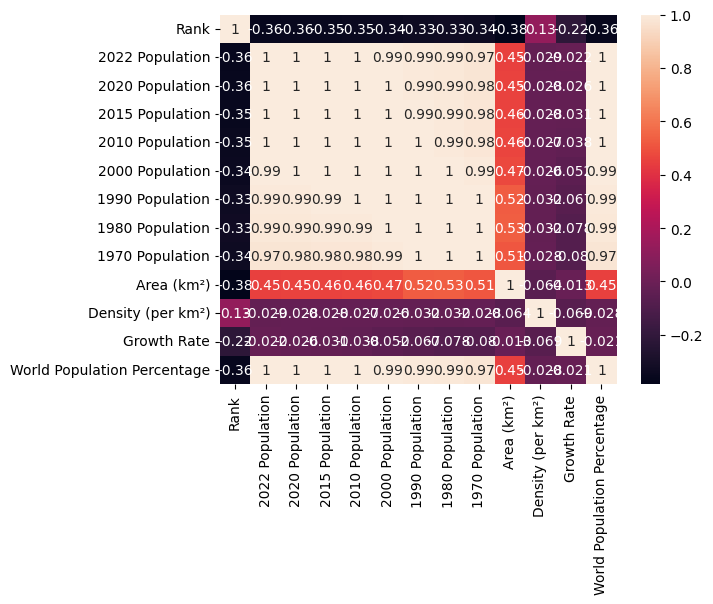

In [12]:
sns.heatmap(data=df.corr(method='pearson',numeric_only=True), annot=True,square=False )
plt.show()

<Axes: xlabel='Continent'>

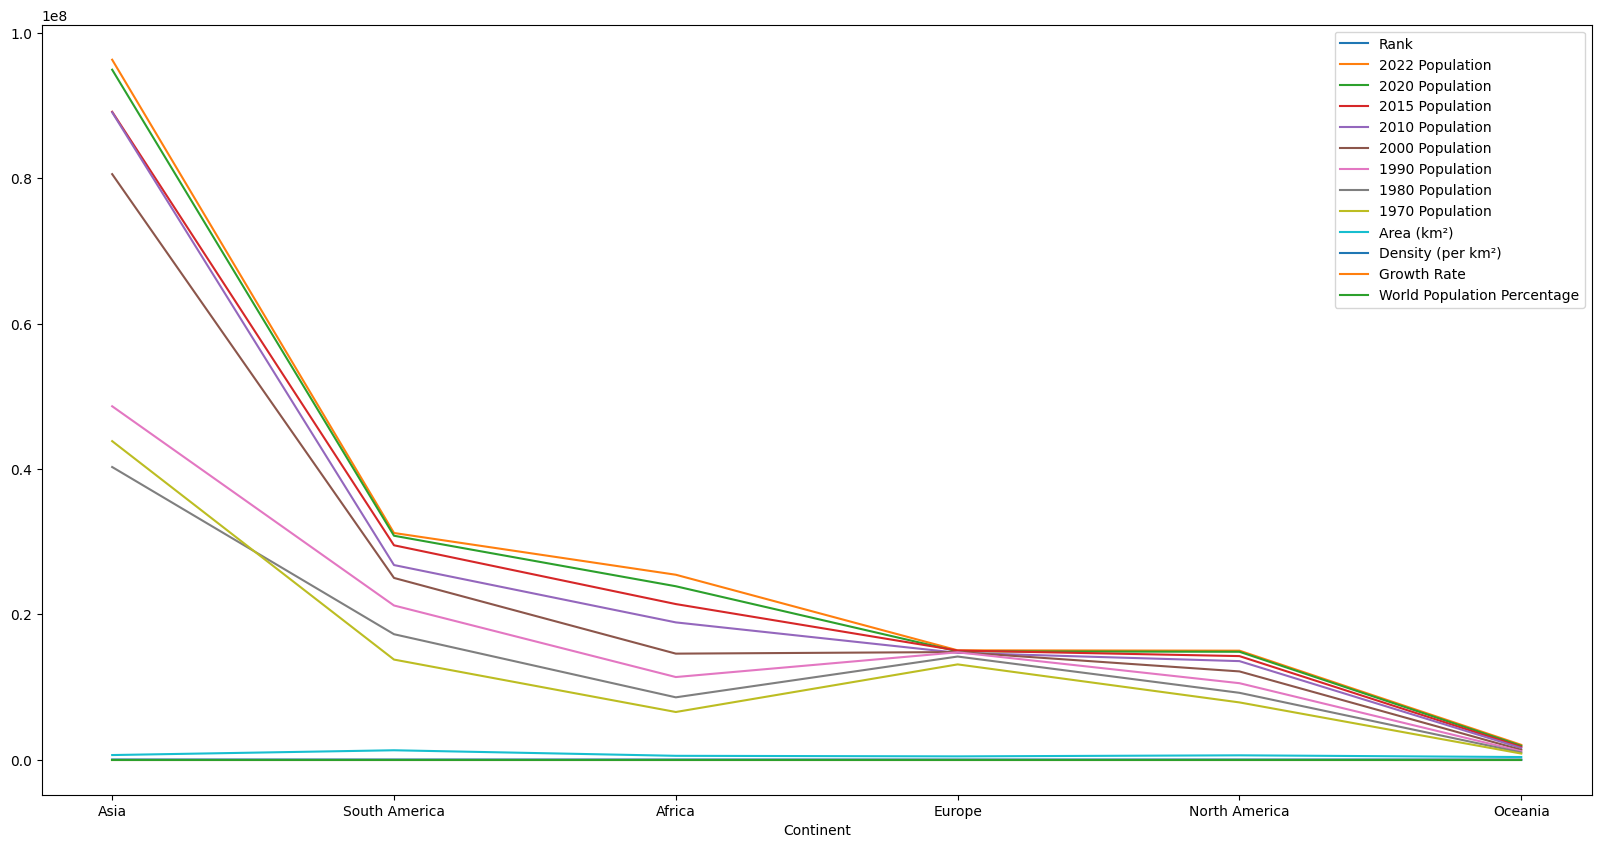

In [13]:
df2=df.groupby(by='Continent').mean(numeric_only=True).sort_values('2022 Population', ascending=False)
df2.plot(figsize=(20,10))

In [14]:
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [15]:
df2=df.groupby(by='Continent')[['1970 Population',
       '1980 Population', '1990 Population', '2000 Population',
       '2010 Population', '2015 Population', '2020 Population',
       '2022 Population']].mean(numeric_only=True).sort_values('2022 Population', ascending=False)
df2

,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,2015 Population,2020 Population,2022 Population
Continent,,,,,,,,
Asia,43839877.83,40278333.33,48639995.33,80580835.11,89087770.00,89165003.64,94955134.37,96327387.31
South America,13781939.71,17270643.29,21224743.93,25015888.69,26789395.54,29509599.71,30823574.50,31201186.29
Africa,6567175.27,8586031.98,11376964.52,14598365.95,18898197.31,21419703.57,23871435.26,25455879.68
Europe,13118479.82,14200004.52,14785203.94,14817685.71,14712278.68,15027454.12,14915843.92,15055371.82
North America,7885865.15,9207334.03,10531660.62,12151739.60,13568016.28,14259596.25,14855914.82,15007403.40
Oceania,846968.26,996532.17,1162774.87,1357512.09,1613163.65,1756664.48,1910148.96,2046386.32


In [16]:
df3=df2.transpose()

In [17]:
df3

Continent,Asia,South America,Africa,Europe,North America,Oceania
1970 Population,43839877.83,13781939.71,6567175.27,13118479.82,7885865.15,846968.26
1980 Population,40278333.33,17270643.29,8586031.98,14200004.52,9207334.03,996532.17
1990 Population,48639995.33,21224743.93,11376964.52,14785203.94,10531660.62,1162774.87
2000 Population,80580835.11,25015888.69,14598365.95,14817685.71,12151739.60,1357512.09
2010 Population,89087770.00,26789395.54,18898197.31,14712278.68,13568016.28,1613163.65
2015 Population,89165003.64,29509599.71,21419703.57,15027454.12,14259596.25,1756664.48
2020 Population,94955134.37,30823574.50,23871435.26,14915843.92,14855914.82,1910148.96
2022 Population,96327387.31,31201186.29,25455879.68,15055371.82,15007403.40,2046386.32


<Axes: >

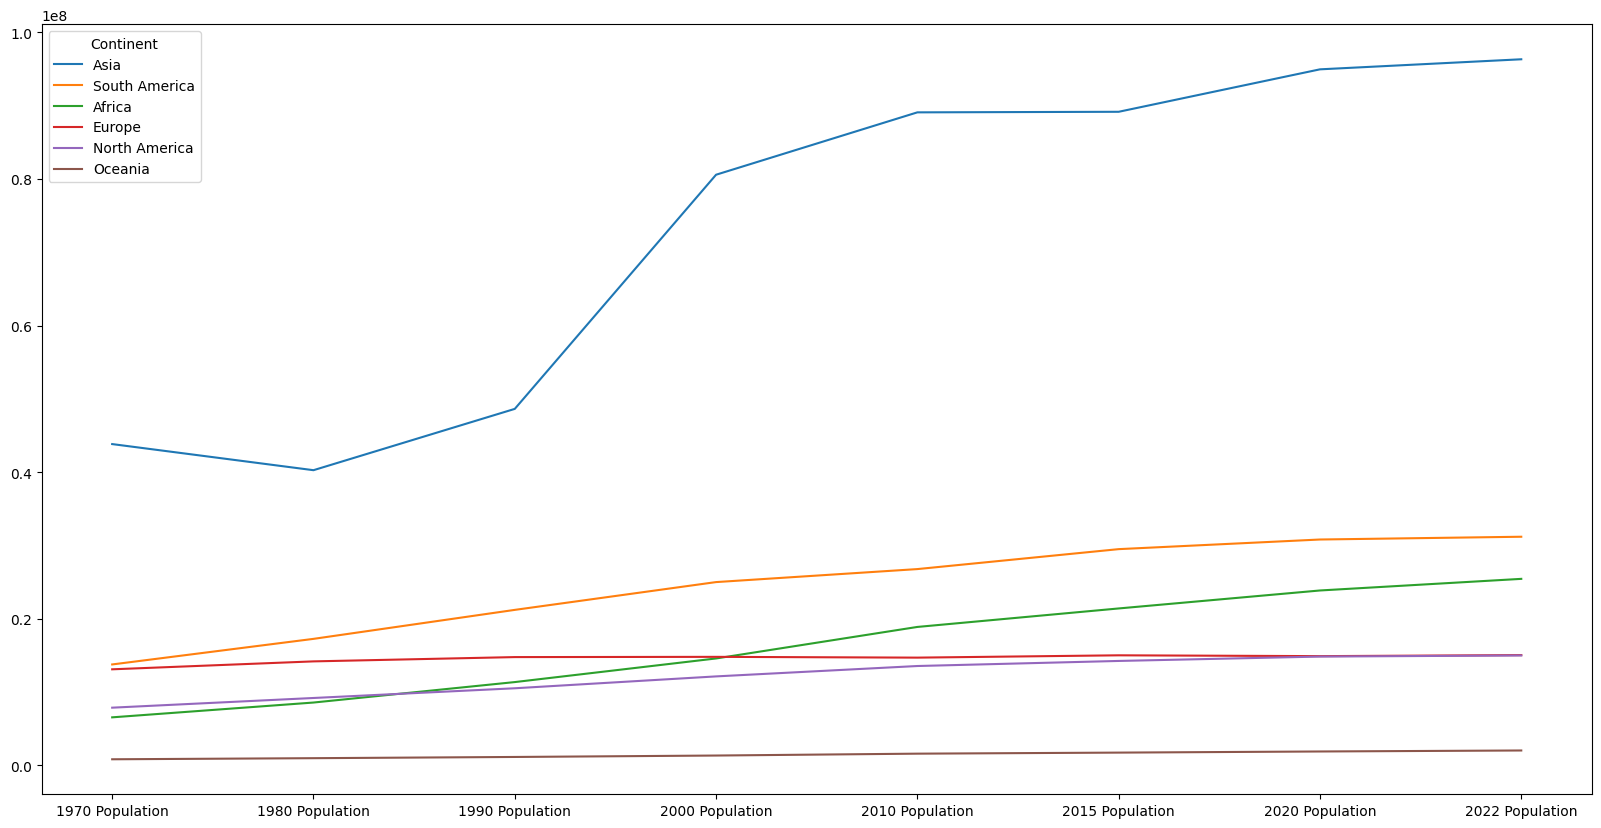

In [18]:
df3.plot(figsize=(20,10))

<Axes: >

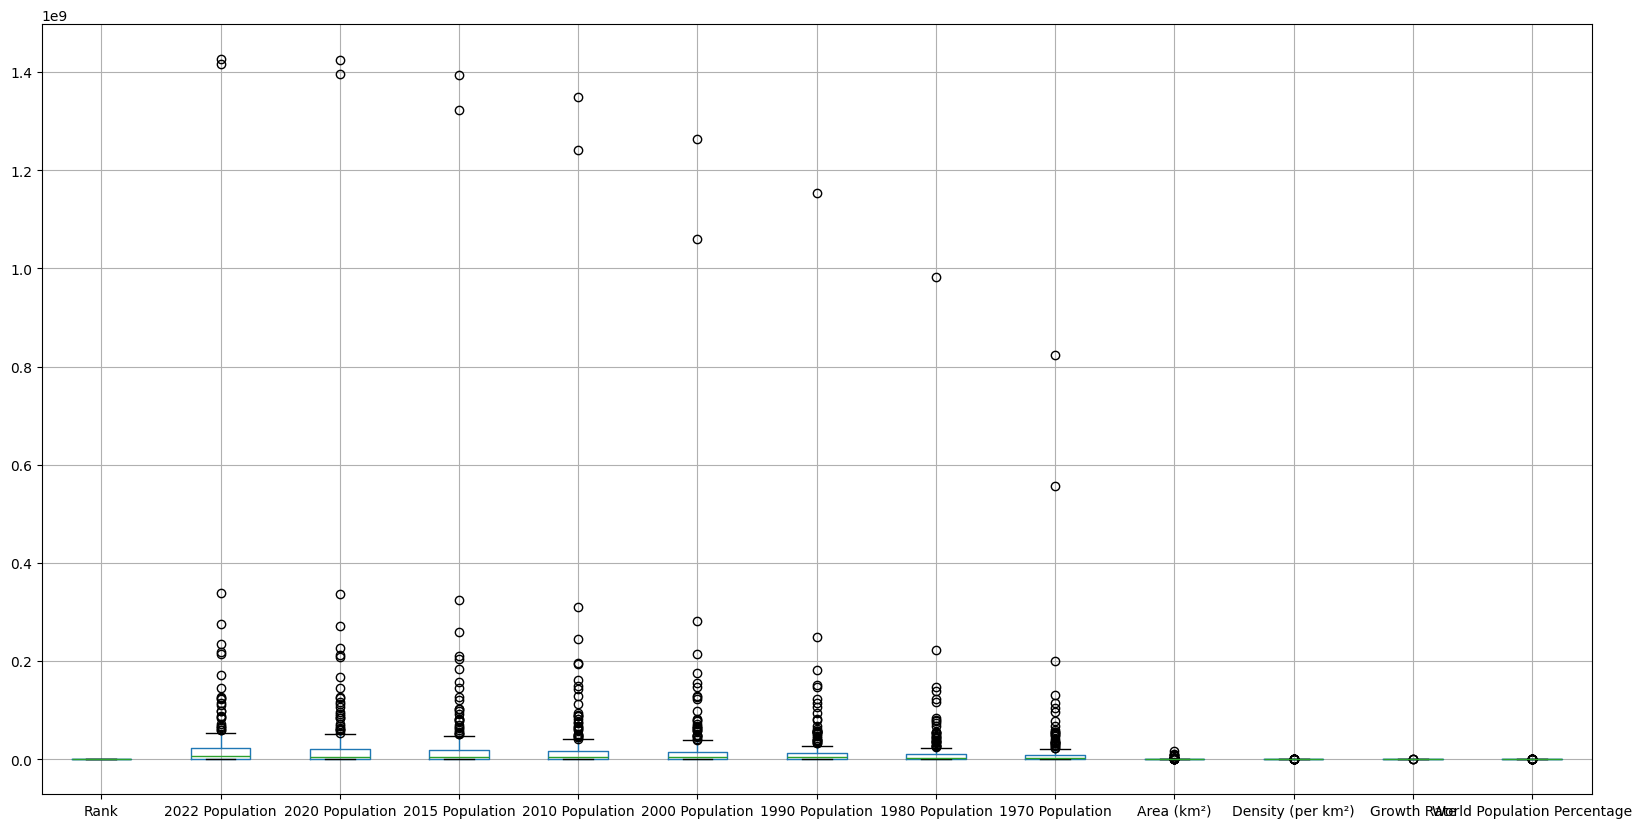

In [19]:
df.boxplot(figsize=(20,10))